# <center> Component Two David Webb 20104099 <center>

Initial import of libraries and data from component 1. <br>
Assignment requirement solutions are subtitled by number.

In [1]:
# import of necessary libraries for the data manipulation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
sns.set_context("notebook")

print('libraries imported')

libraries imported


In [2]:
# load master dataset
df = pd.read_csv('df.csv')

print('data imported')

data imported


### 1. Distribution of all numeric features investigated.

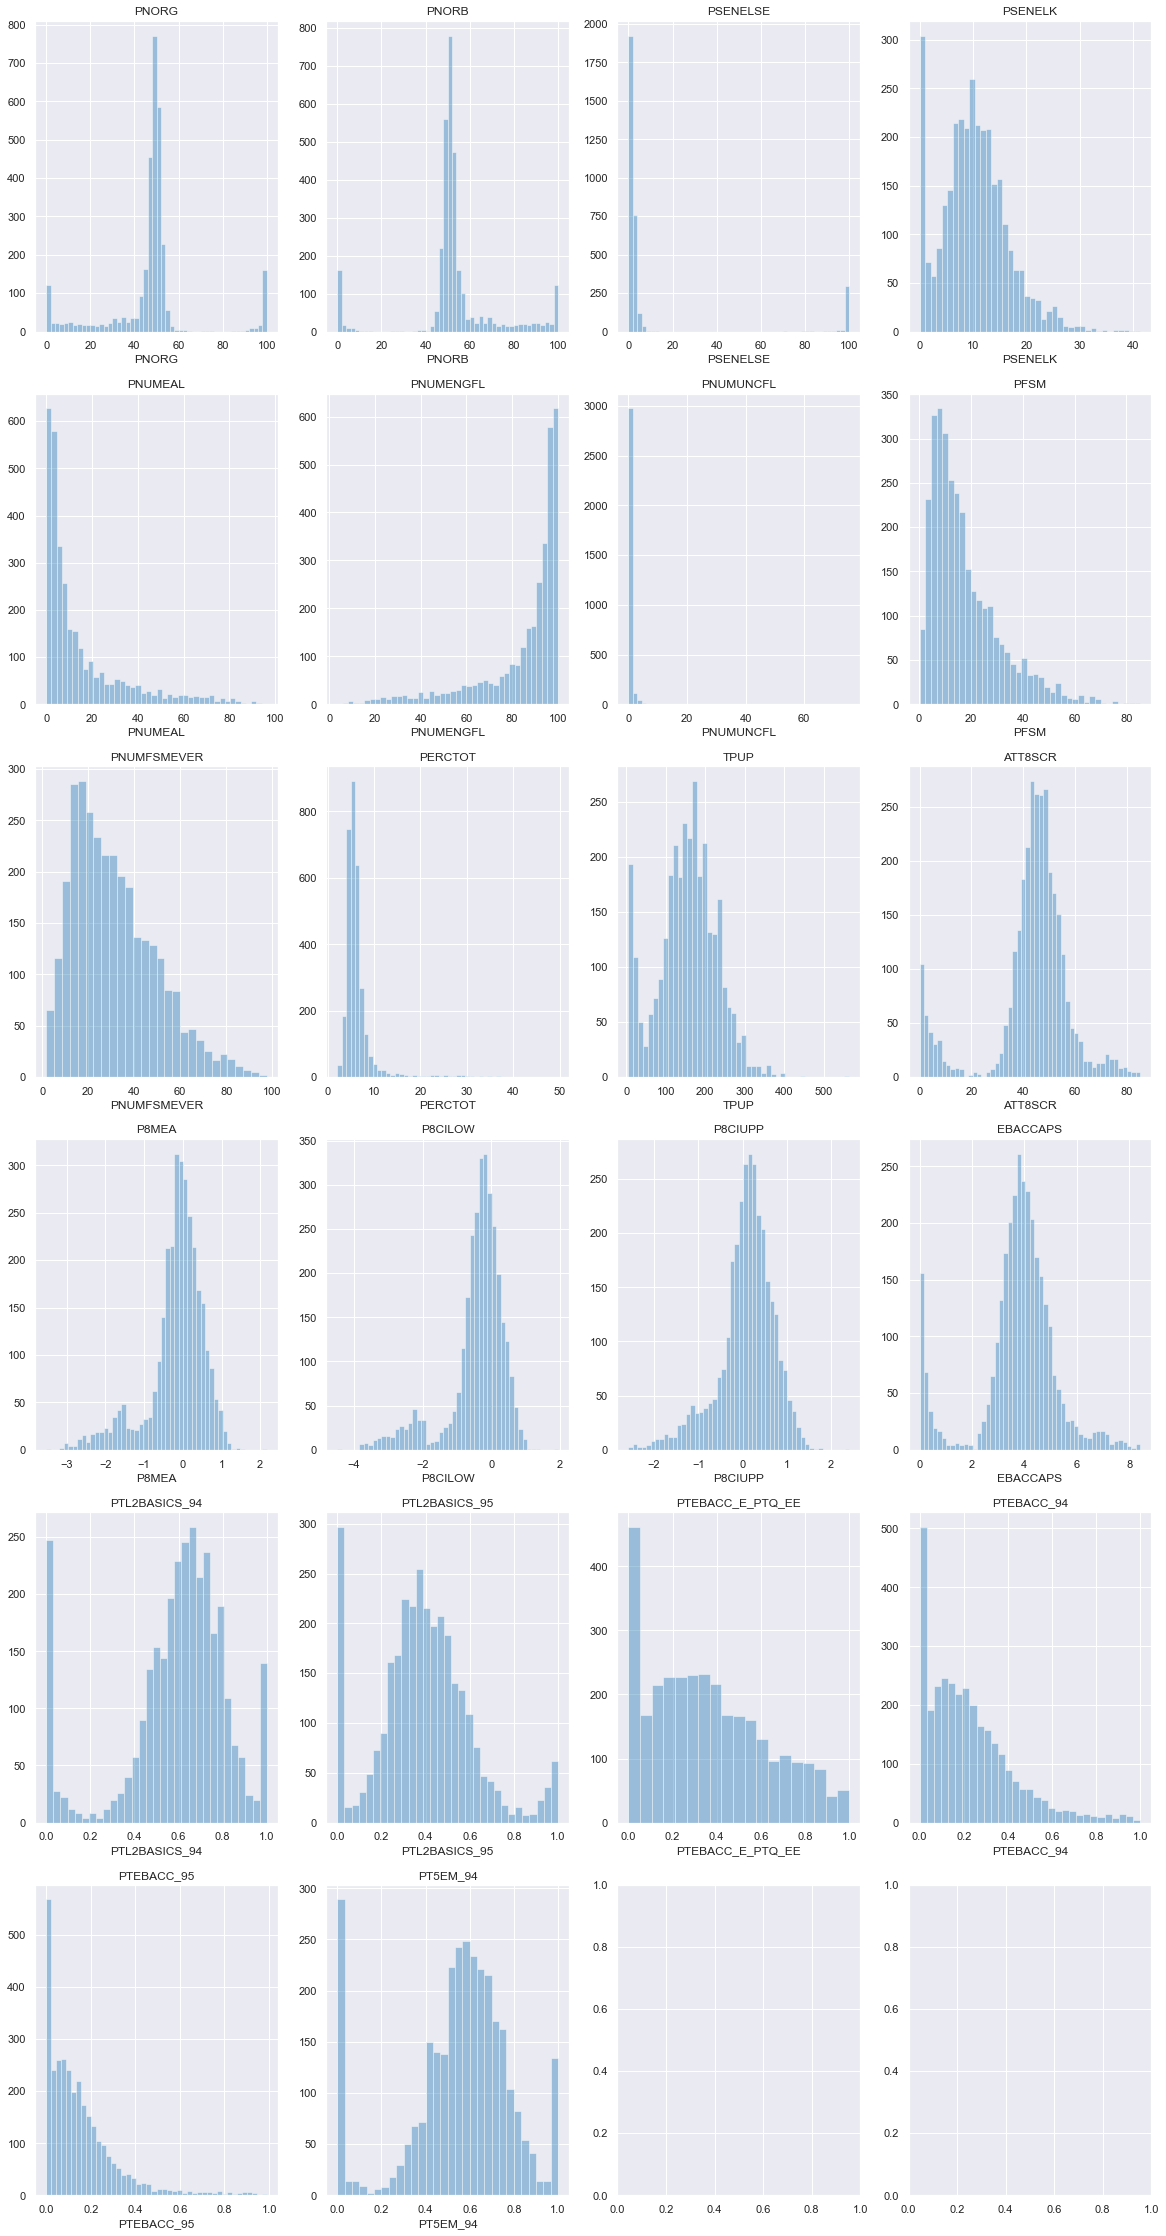

In [3]:
# select numeric only variables
df_num = df.select_dtypes(include=['float64'])

# set up grid of axes for plots
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20,40))

# populate axes with variable distribution data
for col, ax in zip(df_num.columns, axes.flatten()):
    sns.distplot(df_num[col], ax=ax, kde=False)
    ax.set_title(col)

Assessing the distribution plots of the numeric variables a few key features stand out, namely:
-	PNELSE has two distinct populations around 0 and 100% <br><br>
-	Signs of split populations in several of the variables namely (TPUP, ATT8SCR, P8MEA, P8CILOW, P8CIUPP (less prominent but noticeable), PLT2BASICS_84).  All appear to have a much smaller sub population with particularly low scores for each of the variables.  A lot of these variables are related in the ways the scores are calculated [1] so it makes sense that this is seen on numerous occasions.<br><br>
-	Several of the variables (PSENELK, TPUP, ATT8SCR, EBACCAPS, PLT2BASICS_94, PLT2BASICS_95, PTEBACC_E_PTQ_EE, PTEBACC_94, PTEBACC_95, PT5EM_94) have large out of place spikes at 0, indicating either very low levels of scoring or 0 occurrences.  Potential for this to be instances of data unknown entered in a different way.<br><br>
-	PNUMUNCFL variable is almost exclusively populated with zeroes.  Potential to drop the column or change to zero or some value for future machine learning purposes.
<br>
<br>
<font size="0.5">
  [1]	‘Understanding school and college performance measures’, GOV.UK. https://www.gov.uk/government/publications/understanding-school-and-college-performance-measures/understanding-school-and-college-performance-measures (accessed Nov. 20, 2020).  
</font>

### 2. Detailed visualisation of the 'PNORG' variable distribution.

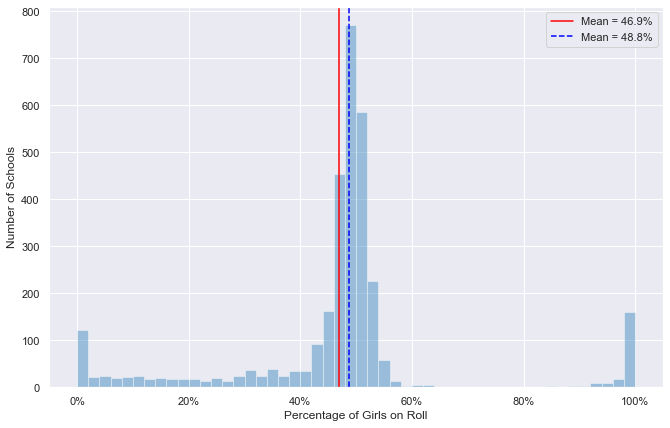

In [28]:
# define mean and median values for variable
mean = df['PNORG'].mean()
median = df['PNORG'].median()

# set labels for summary stats of interest
meanlab = 'Mean = ' + str(round(mean, ndigits=1)) + '%'
medlab = 'Mean = ' + str(round(median, ndigits=1)) + '%'

# plot variable distribution
plt.figure(figsize=(11, 7))
sns.distplot(df['PNORG'], kde=False)

# add in lines for the summary stats
plt.axvline(mean, color='r')
plt.axvline(median, color='b', ls='--')

# set legend, x-axis ticks and axis labels
plt.legend({meanlab:mean, medlab:median})
plt.xticks(ticks=[0, 20, 40, 60, 80, 100], labels=['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xlabel('Percentage of Girls on Roll')
plt.ylabel('Number of Schools');

### 3. Distribution of mixed features (numeric with nominal notes).

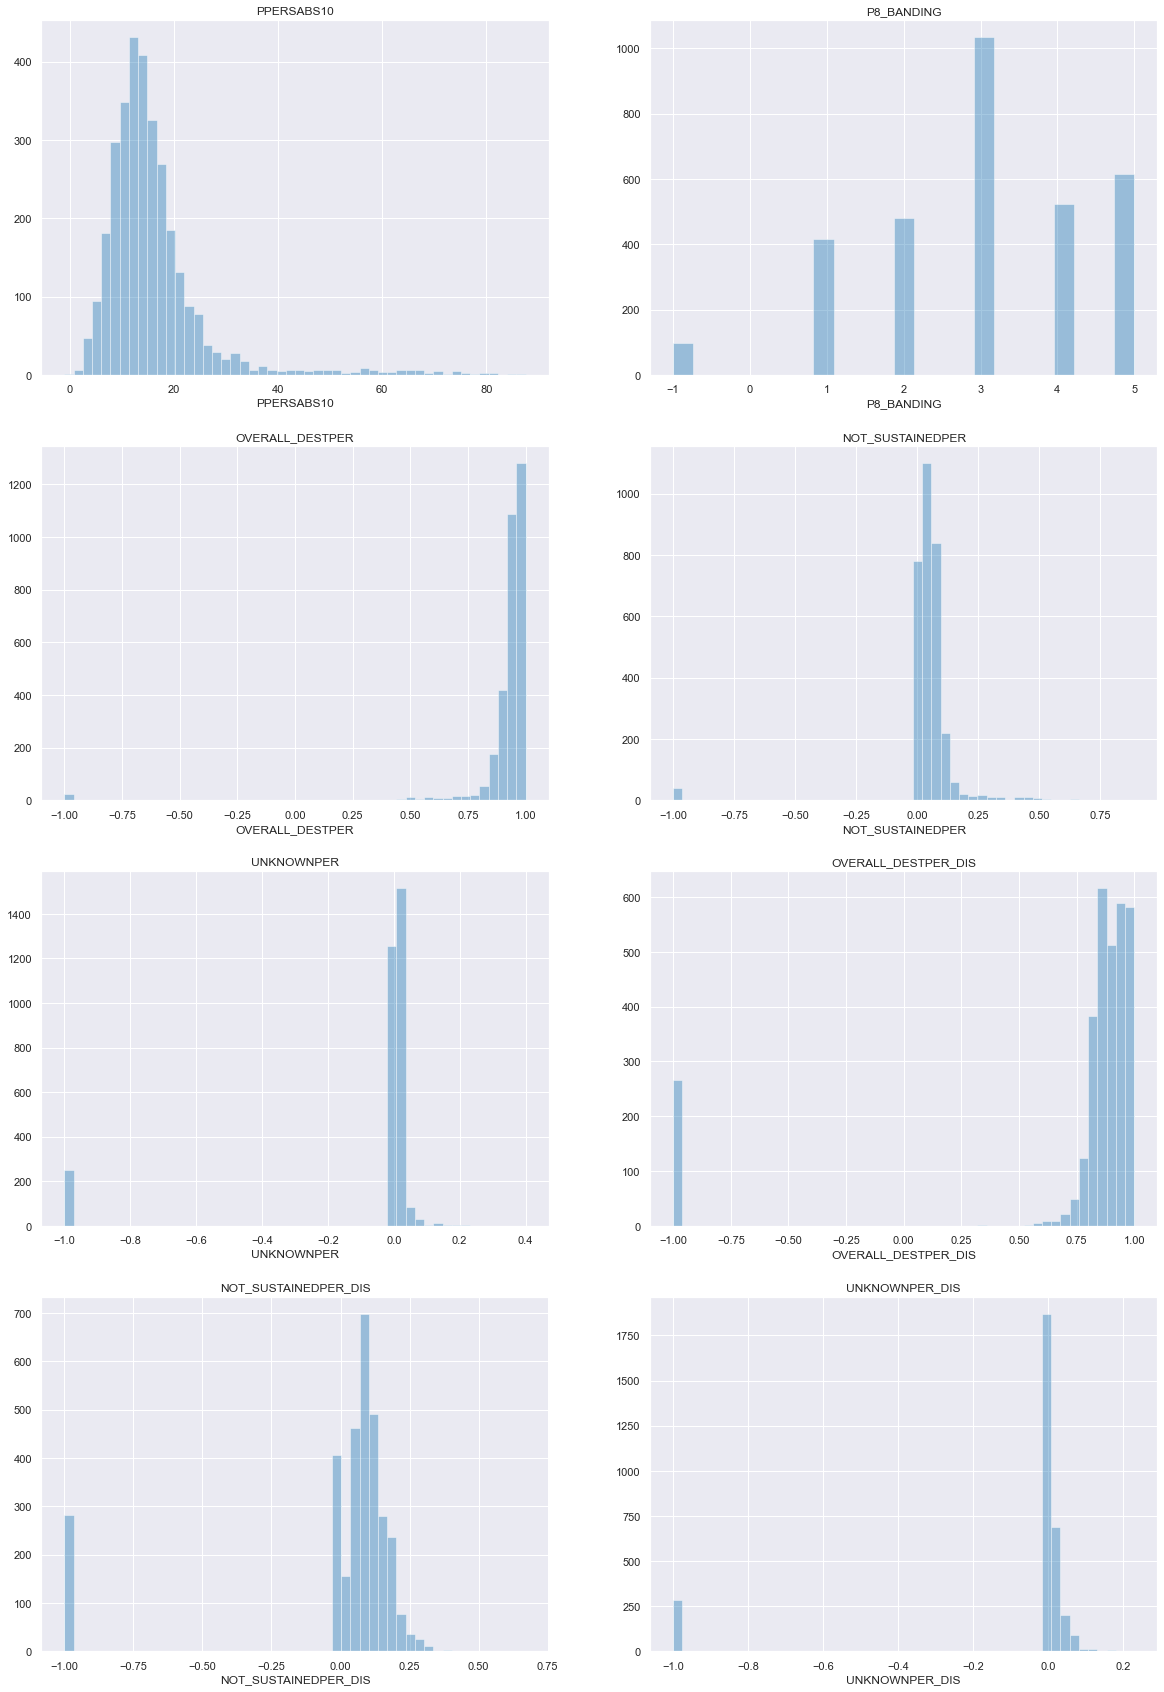

In [5]:
# nominal note features temprarily replaced with -1 to aloow distribution plotting
df_temp = df.replace(['SUPP','NE','LOWCOV', 'SP'], -1)

# select mixed variables
df_mix = df_temp[['PPERSABS10', 'P8_BANDING', 'OVERALL_DESTPER', 'NOT_SUSTAINEDPER', 'UNKNOWNPER',
                 'OVERALL_DESTPER_DIS', 'NOT_SUSTAINEDPER_DIS', 'UNKNOWNPER_DIS']]
df_mix = df_mix.astype('float64')

# set up grid of axes for plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,30))

# populate axes with variable distribution data
for col, ax in zip(df_mix.columns, axes.flatten()):
    sns.distplot(df_mix[col], ax=ax, kde=False)
    ax.set_title(col)

Assessing the distribution plots of the non-numeric variables a few key features stand out, namely:
 - ‘P8_BANDING’ shows a spike at the score of 3 with other values displaying a fairly uniform distribution <br><br>
 - ‘PPERSABS10’ shows a heavy positive skew in the data <br><br>
 - ‘UNKNOWNPER’ and ‘UNKNOWNPER_DIS’ contain a very small spread of data at low values with large spikes at 0 <br><br>
 - ‘OVERALL_DESTPER’ and ‘NOT_SUSTAINEDPER’ are near mirror images of each other with ‘OVERALL_DESTPER’ having values at or close to 100% and ‘NOT_SUSTAINEDPER’ having values at or close to 0% <br><br>
 - ‘OVERALL_DESTPER_DIS’ and ‘NOT_SUSTAINEDPER_DIS’ show similar behaviour to the ‘OVERALL_DESTPER’ and ‘NOT_SUSTAINEDPER’ pairing, but do show a wider spread in the data


### 4. Distribution of non-numeric features.

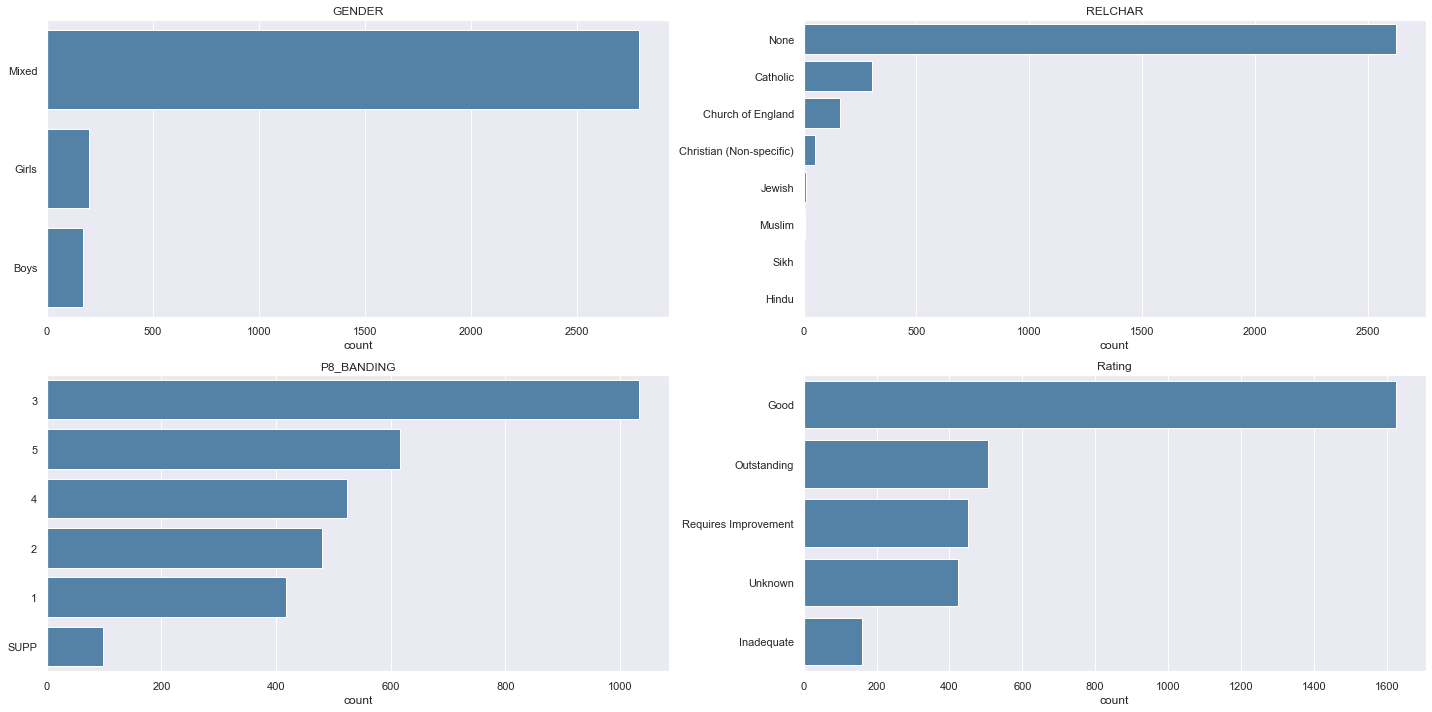

In [6]:
# use non-numeric only variable list from component 1
cat_col = ['GENDER', 'RELCHAR', 'P8_BANDING', 'Rating']


# select non-numeric only variables
df_cat_col = df[cat_col]

# set up grid of axes for plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

# populate axes with variable distribution data
for col, ax in zip(df_cat_col.columns, axes.flatten()):
    sns.countplot(y=df_cat_col[col], ax=ax, color='SteelBlue', order = df_cat_col[col].value_counts().index)
    ax.set_title(col)
    ax.set(ylabel='')
    plt.tight_layout()

Assessing the distribution plots of the non-numeric variables a few key features stand out, namely:
-	The ‘GENDER’ variable is almost entirely made up of mixed schools with a small number of all boys/girls schools seen.  Potential to simplify this column to only ‘Mixed’ and ‘Same sex’ entries (probably with a dummy variable) for any machine learning purposes.<br><br>
-	The ‘RELCHAR’ variable is almost entirely made up of schools with no religious affiliation, and schools which do have religious affiliation are dominated by Christian schools (Catholic, CoE and non-specific).  Potential to simplify this column to only ‘Non-Religious’ and ‘Religious’ (probably with a dummy variable) for any machine learning purposes.<br><br>
-	Small portion of unknown ‘SUPP’ bandings in the ‘p8_BANDING’ variable which may need to be dropped from the data.<br><br>
-	Large portion of ‘Unknown’ ratings in the ‘Rating’ variable which may need to be dropped from the data.


### 5. Relationship between Progress 8 Score and % of Pupils on Free School Meals

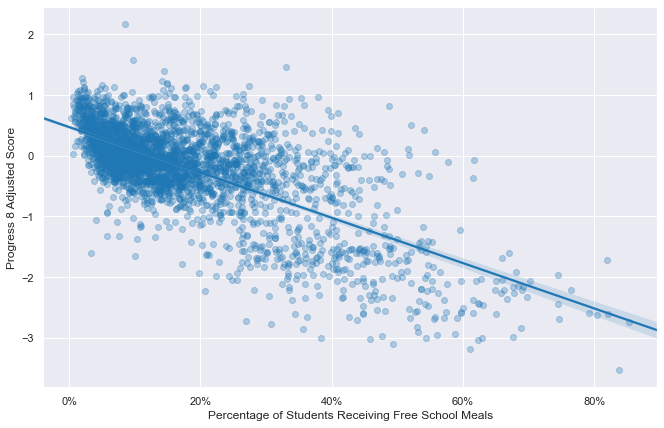

In [7]:
# scatter plot of variables
plt.figure(figsize=(11, 7))
sns.regplot(x='PFSM', y='P8MEA', data=df, scatter_kws={'alpha':0.3})
plt.xticks(ticks=[0, 20, 40, 60, 80], labels=['0%', '20%', '40%', '60%', '80%'])
plt.xlabel('Percentage of Students Receiving Free School Meals')
plt.ylabel('Progress 8 Adjusted Score');

In [8]:
# stats test on linear relationship
from scipy import stats
r,p=stats.pearsonr(df['PFSM'], df['P8MEA'])
print("Variables have a Pearson's correlation coefficient of ", str(round(r, 2)), ", with a p-value of ", str(round(p, 2)), ".")

Variables have a Pearson's correlation coefficient of  -0.69 , with a p-value of  0.0 .


We can see a moderate to high negative correlation between the % of Pupils Receiving Free School Meals and the Progress 8 Adjusted Score for schools in England.  A Pearson's rank coefficient of -0.69 confirms this with a significant result at the 95% confidence level (p-value << 0.05).  <br><br>
The scatterplot shows that the majority of schools have <20% of pupils receiving free school meals and obtain an average progress 8 score between -1 and 1, as shown by the dense cluster of datapoints in this region.  The negative linear relationship between the variables is heavily influenced by the number of schools receiving a Progress 8 score of <-1 that have a high probability of >20% of the pupils receiving free school meals.

### 6. Relationship between Progress 8 Score and Attainment 8 Score

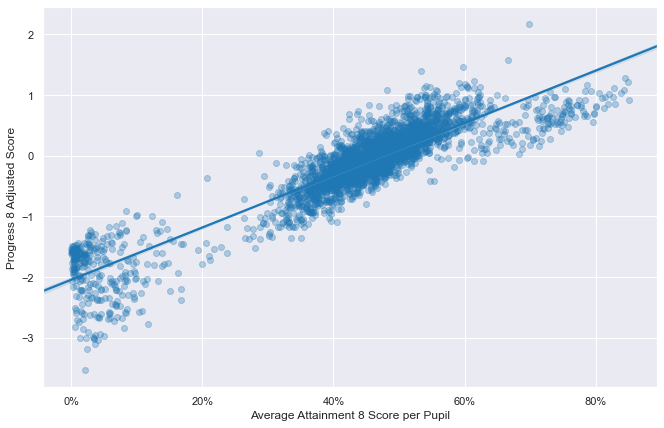

In [27]:
# scatter plot of variables
plt.figure(figsize=(11, 7))
sns.regplot(x='ATT8SCR', y='P8MEA', data=df, scatter_kws={'alpha':0.3})
plt.xticks(ticks=[0, 20, 40, 60, 80], labels=['0%', '20%', '40%', '60%', '80%'])
plt.xlabel('Average Attainment 8 Score per Pupil')
plt.ylabel('Progress 8 Adjusted Score');

In [10]:
# stats test on linear relationship
from scipy import stats
r,p=stats.pearsonr(df['ATT8SCR'], df['P8MEA'])
print("Variables have a Pearson's correlation coefficient of ", str(round(r, 2)), ", with a p-value of ", str(round(p, 2)), ".")

Variables have a Pearson's correlation coefficient of  0.91 , with a p-value of  0.0 .


We can see a strong positive linear relationship between the Progress 8 Adjusted Score and the Average Attainment 8 Score per Pupil for schools in England.  A Pearson's rank coefficient of 0.91 confirms this with a significant result at the 95% confidence level (p-value << 0.05).  <br><br>
A strong correlation is expected as the Attainment 8 Score is used to calculate the Progress 8 Adjusted Score for a pupil [1], so it would have been a surprise to see no relationship between the two.  The scatterplot does highlight the two sub-populations of the schools seen earlier however, with a distinct separate group of schools with particularly low Progress 8 and Attainment 8 scores seen.  Interestingly also seen is that at very high levels of Average Attainment 8 Scores (60 and above) the Progress 8 score is far more likely to be below the line of best fit than above.  As the progress 8 score is a measure of improvement this perhaps an indicator that high achieving students are less likely to higher levels of improvement than those who are at a lower achievement level.
<br>
<br>
<font size="0.5">
  [1]	‘Understanding school and college performance measures’, GOV.UK. https://www.gov.uk/government/publications/understanding-school-and-college-performance-measures/understanding-school-and-college-performance-measures (accessed Nov. 20, 2020).  
</font>

### 7. Detailed violin plot of the 'P8-BANDING' data

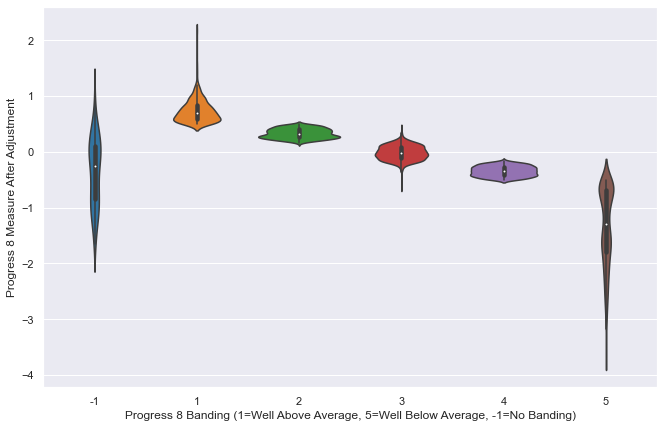

In [11]:
df['P8_BANDING'].replace(['SUPP'], '-1', inplace=True)

plt.figure(figsize=(11, 7))
sns.violinplot(df['P8_BANDING'], df['P8MEA'], order=['-1', '1', '2', '3', '4', '5'])
plt.xlabel('Progress 8 Banding (1=Well Above Average, 5=Well Below Average, -1=No Banding)')
plt.ylabel('Progress 8 Measure After Adjustment');

# NB visualisation reproduced as requested in the assignment requirements.  
# Generally would only use one colour in the chart unless highlighting a particular distribution from the others.

### 8. Local Authorities with the highest and lowest average Attainment 8 and Progress 8 scores.

Would usually look to plot this to also assess the distribution but there are too many LA Names for this to be pratical so table call methods are instead used.

In [12]:
# import the 'la_and_region_codes_meta' file
la_codes = pd.read_csv('la_and_region_codes_meta.csv')

# rename LEA column for consistency
la_codes.rename(columns={'LEA':'LA'}, inplace=True)

# merge authority data with master dataset
df = df.merge(la_codes[['LA', 'LA Name', 'REGION NAME']], how='left', on = ['LA'])
df.head()

,URN,LA,GENDER,RELCHAR,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,...,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS,Rating,LA Name,REGION NAME
0,100049,202,Mixed,None,41.4,58.6,3.2,11.8,73.1,26.8,...,3,0.9,0.09,0.01,0.89,0.11,0.01,Good,Camden,London Central
1,100050,202,Girls,None,96.0,4.0,1.3,10.2,38.1,60.9,...,1,0.94,0.04,0.02,0.95,0.04,0.01,Good,Camden,London Central
2,100051,202,Mixed,None,45.0,55.0,3.6,11.1,82.6,17.4,...,3,0.86,0.08,0.05,0.85,0.09,0.06,Good,Camden,London Central
3,100052,202,Mixed,None,47.5,52.5,2.4,6.9,55.8,44.2,...,3,0.91,0.08,0.01,0.87,0.13,0,Good,Camden,London Central
4,100053,202,Mixed,None,33.7,66.3,6.2,13.4,28.2,70.3,...,3,0.95,0.04,0.01,0.9,0.07,0.03,Good,Camden,London Central


In [13]:
# Local Authority with the top mean Attainmant 8 Score
df.groupby('LA Name')[['ATT8SCR']].mean().sort_values(by='ATT8SCR', ascending=False).head(1)

,ATT8SCR
LA Name,
Barnet,55.877273


In [14]:
# Local Authority the min mean Attainmant 8 Score
df.groupby('LA Name')[['ATT8SCR']].mean().sort_values(by='ATT8SCR', ascending=True).head(1)

,ATT8SCR
LA Name,
Knowsley,27.275


In [15]:
# Local Authority the largest range of Attainment 8 Scores
df_att_range = df.groupby('LA Name')[['ATT8SCR']].max() - df.groupby('LA Name')[['ATT8SCR']].min()
df_att_range.sort_values(by='ATT8SCR', ascending=False).head(1)

,ATT8SCR
LA Name,
Barnet,84.5


In [16]:
# Local Authority with the top mean Progress 8 Score
df.groupby('LA Name')[['P8MEA']].mean().sort_values(by='P8MEA', ascending=False).head(1)

,P8MEA
LA Name,
Westminster,0.556667


In [17]:
# Local Authority with the min mean Progress 8 Score
df.groupby('LA Name')[['P8MEA']].mean().sort_values(by='P8MEA', ascending=True).head(1)

,P8MEA
LA Name,
Knowsley,-1.18


In [18]:
# Local Authority the largest range of Progress 8 Scores
df_att_range = df.groupby('LA Name')[['P8MEA']].max() - df.groupby('LA Name')[['P8MEA']].min()
df_att_range.sort_values(by='P8MEA', ascending=False).head(1)

,P8MEA
LA Name,
Tower Hamlets,4.35


### 9. Regions with the highest and lowest average Attainment 8 and Progress 8 scores.

Plot of the regions and table call methods are both demonstrated.

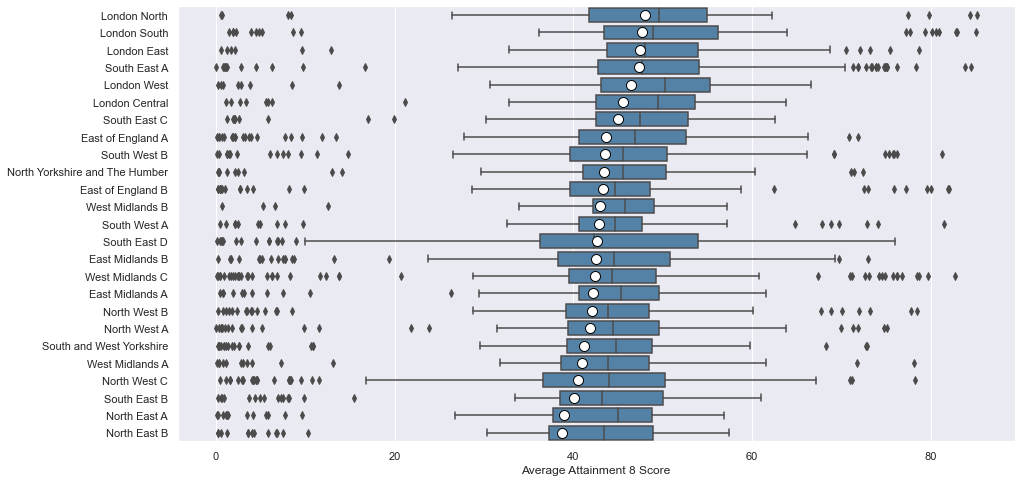

In [19]:
# order columns by mean ATT8SCR
order = df.groupby('REGION NAME')[['ATT8SCR']].mean().sort_values(by='ATT8SCR', ascending=False).index

# plot box and whisker
plt.figure(figsize=(15, 8))
sns.boxplot(x='ATT8SCR', y='REGION NAME', data=df, order=order, color='SteelBlue', showmeans=True,
            meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'10'})
plt.xlabel('Average Attainment 8 Score')
plt.ylabel('');

In [20]:
# Region with the top mean Attainmant 8 Score
df.groupby('REGION NAME')[['ATT8SCR']].mean().sort_values(by='ATT8SCR', ascending=False).head(1)

,ATT8SCR
REGION NAME,
London North,47.963235


In [21]:
# Region with the min mean Attainmant 8 Score
df.groupby('REGION NAME')[['ATT8SCR']].mean().sort_values(by='ATT8SCR', ascending=True).head(1)

,ATT8SCR
REGION NAME,
North East B,38.740964


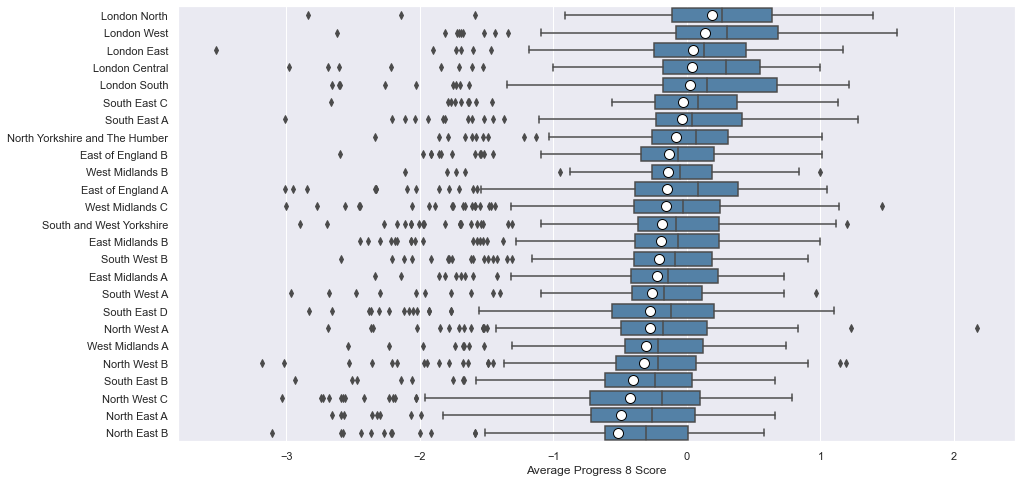

In [22]:
# order columns by mean P8MEA
order = df.groupby('REGION NAME')[['P8MEA']].mean().sort_values(by='P8MEA', ascending=False).index

# plot box and whisker
plt.figure(figsize=(15, 8))
sns.boxplot(x='P8MEA', y='REGION NAME', data=df, order=order, color='SteelBlue', showmeans=True,
            meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'10'})
plt.xlabel('Average Progress 8 Score')
plt.ylabel('');

In [23]:
# Region with the top mean Progress 8 Score
df.groupby('REGION NAME')[['P8MEA']].mean().sort_values(by='P8MEA', ascending=False).head(1)

,P8MEA
REGION NAME,
London North,0.184706


In [24]:
# Region with the min mean Progress 8 Score
df.groupby('REGION NAME')[['P8MEA']].mean().sort_values(by='P8MEA', ascending=True).head(1)

,P8MEA
REGION NAME,
North East B,-0.519157


### 10. Visualisation of the Average Attainment 8 score for the wider English regions.

In [25]:
# define list of wider regions
wid_reg = ['North East', 'North West', 'Yorkshire', 'East Midlands', 'West Midlands', 'East of England',
          'London', 'South East', 'South West']

# generate new 'WIDER REGION' column
df['WIDER REGION'] = np.nan

# populate 'WIDER REGION' column based on the LA region variable
for x in wid_reg:
    df.loc[df['REGION NAME'].str.contains(x), 'WIDER REGION'] = x
    
df.head()

,URN,LA,GENDER,RELCHAR,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,...,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS,Rating,LA Name,REGION NAME,WIDER REGION
0,100049,202,Mixed,None,41.4,58.6,3.2,11.8,73.1,26.8,...,0.9,0.09,0.01,0.89,0.11,0.01,Good,Camden,London Central,London
1,100050,202,Girls,None,96.0,4.0,1.3,10.2,38.1,60.9,...,0.94,0.04,0.02,0.95,0.04,0.01,Good,Camden,London Central,London
2,100051,202,Mixed,None,45.0,55.0,3.6,11.1,82.6,17.4,...,0.86,0.08,0.05,0.85,0.09,0.06,Good,Camden,London Central,London
3,100052,202,Mixed,None,47.5,52.5,2.4,6.9,55.8,44.2,...,0.91,0.08,0.01,0.87,0.13,0,Good,Camden,London Central,London
4,100053,202,Mixed,None,33.7,66.3,6.2,13.4,28.2,70.3,...,0.95,0.04,0.01,0.9,0.07,0.03,Good,Camden,London Central,London


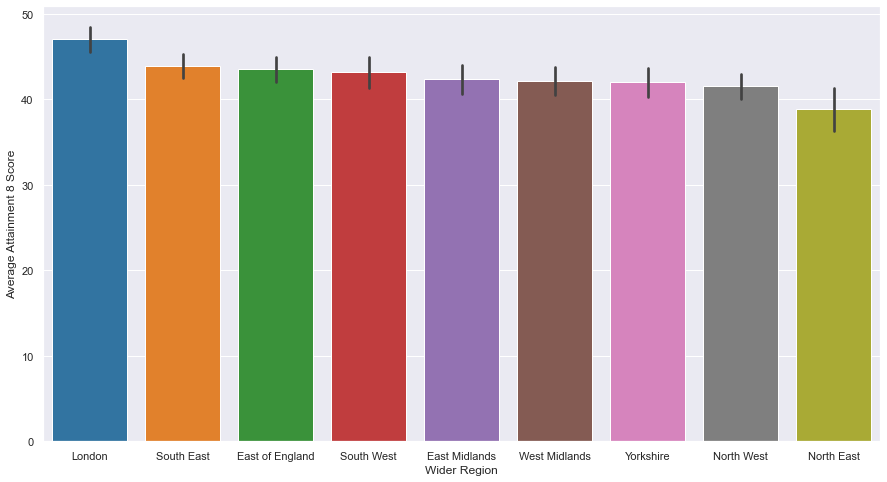

In [26]:
# order columns by mean ATT8SCR
order = df.groupby('WIDER REGION')[['ATT8SCR']].mean().sort_values(by='ATT8SCR', ascending=False).index

# plot barchart
plt.figure(figsize=(15, 8))
sns.barplot('WIDER REGION', 'ATT8SCR', data=df, order=order, ci=95)
plt.xlabel('Wider Region')
plt.ylabel('Average Attainment 8 Score');

# NB visualisation reproduced as requested in the assignment requirements.  
# Generally would only use one colour in the chart unless highlighting a particular bar from the others.